In [202]:
import numpy as np
import pandas as pd
import numpy as np
import gensim
import sklearn
import spacy
import seaborn as sns
from spacy import displacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
from matplotlib import pyplot as plt
%matplotlib inline

In [340]:
arxiv_data = pd.read_csv('../data/processed/arxiv_dataset.csv').drop("Unnamed: 0", axis=1)
def grab_date(updated, created):
    if updated is None and created is None:
        return 
    if updated is None:
        return created 
    if created is None:
        return updated
    return max(created, updated)
    
arxiv_data['updated'] = pd.to_datetime(arxiv_data.updated)
arxiv_data['created'] = pd.to_datetime(arxiv_data.created)
arxiv_data['date'] = arxiv_data.apply(lambda x: grab_date(x['updated'], x['created']), axis=1)

In [341]:
arxiv_data['abstract']

0       wireless ad hoc networks are seldom characteri...
1       this paper discovers fundamental principles of...
2       the low latency fault tolerance (llft) system ...
3       motivated by kleinberg's (2000) and subsequent...
4       a self-stabilizing simulation of a single-writ...
                              ...                        
9149    although cloud computing has been transformati...
9150    mpj express is a messaging system that allows ...
9151    the bulk-synchronous parallel model of computa...
9152    distributed hash tables (dhts) have been used ...
9153    in this paper we study the problem of how resi...
Name: abstract, Length: 9154, dtype: object

### Cleaning the Data 

In [342]:
nlp = spacy.load('en_core_web_sm')
stop_words = ['say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be']
for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

<>:2: DeprecationWarning: invalid escape sequence '\s'
<>:2: DeprecationWarning: invalid escape sequence '\s'
/var/folders/td/x8g_cy716gz_hg0jqf16sm000000gn/T/ipykernel_2589/3513328973.py:2: DeprecationWarning: invalid escape sequence '\s'
  stop_words = ['say', '\s', 'mr', 'Mr', 'said', 'says', 'saying', 'today', 'be']
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is dep

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POIN

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/catalogue/__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POIN

In [344]:
def clean_the_data(document):
    document = document.split()
    new_document = []
    for word in document : 
        if word != '\n' and not nlp.vocab[word].is_stop and not nlp.vocab[word].is_punct and not nlp.vocab[word].like_num and word.lower() not in ['i', 'we']: 
            new_document.append(word)
    return new_document

In [345]:
texts = arxiv_data['title'].apply(clean_the_data).to_list()

In [346]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [347]:
lda_model = LdaModel(corpus=corpus, num_topics=13, id2word=dictionary, per_word_topics=2)
lda_model.show_topics(num_topics=13)

[(0,
  '0.020*"energy" + 0.013*"based" + 0.012*"methods" + 0.011*"multicore" + 0.011*"computing" + 0.010*"smart" + 0.010*"algorithms" + 0.010*"hpc" + 0.010*"heterogeneous" + 0.010*"high-performance"'),
 (1,
  '0.039*"analysis" + 0.038*"data" + 0.022*"performance" + 0.021*"big" + 0.019*"framework" + 0.011*"research" + 0.010*"parallel" + 0.010*"intel" + 0.009*"access" + 0.008*"throughput"'),
 (2,
  '0.042*"memory" + 0.017*"efficient" + 0.011*"clouds" + 0.010*"reduction" + 0.010*"management" + 0.010*"dynamic" + 0.010*"transactional" + 0.009*"learning" + 0.009*"power" + 0.009*"classification"'),
 (3,
  '0.019*"learning" + 0.016*"gpus" + 0.014*"case" + 0.014*"study" + 0.013*"model" + 0.011*"performance" + 0.011*"grid" + 0.011*"dynamics" + 0.010*"federated" + 0.010*"logic"'),
 (4,
  '0.042*"cloud" + 0.035*"computing" + 0.023*"data" + 0.018*"distributed" + 0.016*"systems" + 0.015*"performance" + 0.014*"network" + 0.011*"model" + 0.011*"resource" + 0.011*"virtual"'),
 (5,
  '0.029*"parallel" +

In [459]:
import re
lda_topic_dict = {topic[0]: topic[1] for topic in lda_model.show_topics(num_topics=13)}
arxiv_data['Topic-Words'] = arxiv_data.Topic.apply(lambda x: lda_topic_dict[x])


In [460]:
def strip_topic_words(topic_words):
    just_words = [re.sub(r'[0-9]+', '', word).strip().replace("*", "").replace(".", "").replace('"', "") for word in topic_words.split("+")]
    return ' '.join(just_words)

arxiv_data['Topic-Words'] = arxiv_data['Topic-Words'].apply(strip_topic_words)

In [348]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [349]:
pyLDAvis.enable_notebook()
gensimvis.prepare(lda_model, corpus, dictionary)

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.139853 -0.045170       1        1  11.965237
7     -0.020047  0.016566       2        1  10.528600
5     -0.078014 -0.000587       3        1   9.597184
0      0.018450  0.089012       4        1   7.828052
6      0.010522  0.044031       5        1   7.547680
8     -0.042200 -0.034517       6        1   7.134838
1      0.117133 -0.181454       7        1   7.015056
11    -0.089123  0.020696       8        1   6.936027
10     0.047502  0.067800       9        1   6.468219
12    -0.075010  0.001666      10        1   6.441835
9     -0.164104 -0.082569      11        1   6.291378
3      0.056119 -0.054618      12        1   6.233923
2      0.078919  0.159146      13        1   6.011970, topic_info=             Term         Freq        Total Category  logprob  loglift
27         memory   278.000000   278.000000  Default  30.0000  30.0000
4        networks   637.000000   637.000000  Default  29.0000  29.0000
94          cloud   515.000000   515.000000  Default  28.0000  28.0000
289      analysis   415.000000   415.000000  Default  27.0000  27.0000
48    distributed  1117.000000  1117.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
472        shared    20.699310    67.468743  Topic13  -5.2183   1.6299
235      adaptive    21.343072   131.117354  Topic13  -5.1876   0.9961
79   architecture    22.576831   244.444669  Topic13  -5.1314   0.4294
679       virtual    20.909489   122.982025  Topic13  -5.2082   1.0396
158        hybrid    18.482209   109.896699  Topic13  -5.3315   1.0287

[871 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2173      8  0.039117     (extended
2173      9  0.938806     (extended
3624      1  0.919799             +
2748      7  0.909225      abstract
2214      2  0.878003  abstractions
...     ...       ...           ...
859       8  0.084361      workload
859       9  0.703006      workload
859      13  0.196842      workload
2856      5  0.892105    worst-case
1832      7  0.938917          xeon

[2285 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 6, 1, 7, 9, 2, 12, 11, 13, 10, 4, 3])

In [350]:
topics = lda_model.get_document_topics(corpus)

In [351]:
paper_topic_assignment = [sorted(doc_topics, key=lambda x: x[1], reverse=True)[0] for doc_topics in topics]

In [352]:
arxiv_data['Topic'] = list(map(lambda x: x[0], paper_topic_assignment))
arxiv_data['Topic_Prob'] = list(map(lambda x: x[1], paper_topic_assignment))

### Co-Authorship Networks 

In [509]:
from itertools import combinations
authors = [eval(authors) for authors in arxiv_data['authors'].tolist()]

In [510]:
author_pairs = [list(combinations(author, 2)) for author in authors]

In [511]:
df = []
for authors, paper_id in list(zip(author_pairs, arxiv_data.id.to_list())):
    for author_pairs in authors:
        df.append([author_pairs[0], author_pairs[1], paper_id])

In [512]:
coauthor_df = pd.DataFrame(df)
coauthor_df.columns = ['author1', 'author2', 'paper_id']

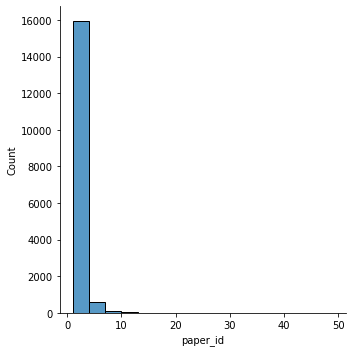

In [513]:
sns.displot(coauthor_df.groupby('author1')['paper_id'].nunique(), kind='hist')

In [498]:
recurring_authors_author2

author2
a. salman avestimehr      19
abbas jamalipour           4
abderazek ben abdallah     4
abdul dakkak               4
abdullah al mahmud         4
                          ..
zibin zheng                6
zizhong chen               5
zohreh sanaei              4
zoya dyka                  4
zvi lotker                 5
Name: paper_id, Length: 824, dtype: int64

In [521]:
recurring_authors_author1 = coauthor_df.groupby('author1')['paper_id'].nunique()[coauthor_df.groupby('author1')['paper_id'].nunique() > 3]

recurring_authors_author2 = coauthor_df.groupby('author2')['paper_id'].nunique()[coauthor_df.groupby('author2')['paper_id'].nunique() > 3]
filtered_authors = coauthor_df[(coauthor_df['author1'].isin(recurring_authors_author1.index)) & (coauthor_df['author2'].isin(recurring_authors_author2.index))]

In [522]:
filtered_authors

,author1,author2,paper_id
9,noga alon,shlomi dolev,1007.1802
10,noga alon,swan dubois,1007.1802
13,hagit attiya,shlomi dolev,1007.1802
14,hagit attiya,swan dubois,1007.1802
17,shlomi dolev,swan dubois,1007.1802
...,...,...,...
120975,alessandro lonardo,piero vicini,1408.4587
120976,francesco simula,laura tosoratto,1408.4587
120977,francesco simula,piero vicini,1408.4587
120978,laura tosoratto,piero vicini,1408.4587


In [523]:
import networkx as nx

In [524]:
node_colors = filtered_authors.merge(arxiv_data[['id', 'Topic']], left_on='paper_id', right_on='id').groupby('author1')['Topic'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

In [525]:
node_colors

author1
a. h. hassan       1
abdul dakkak       3
abdullah gani      1
abhishek dubey     8
achim basermann    7
                  ..
zibin zheng        4
zohir bouzid       7
zohreh sanaei      4
zoya dyka          7
ľuboš korenčiak    3
Name: Topic, Length: 708, dtype: int64

In [526]:
G_auth = nx.from_pandas_edgelist(filtered_authors, source='author1', target='author2')

In [527]:
import random
colors = []
for _ in range(14):
    r = round(random.random(), 2)
    g = round(random.random(), 2)
    b = round(random.random(), 2)
    a = round(random.random(), 2)
    rgb = [r,g,b,a]
    colors.append(rgb)

In [549]:
colors_plotly = []
for _ in range(14):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    rgb = f"rgb({r},{g},{b})"
    colors_plotly.append(rgb)

In [550]:
color_map = []
for node in G_auth: 
    try:
        color_map.append(colors[node_colors.loc[node]])
    except:
        color_map.append(colors[13])

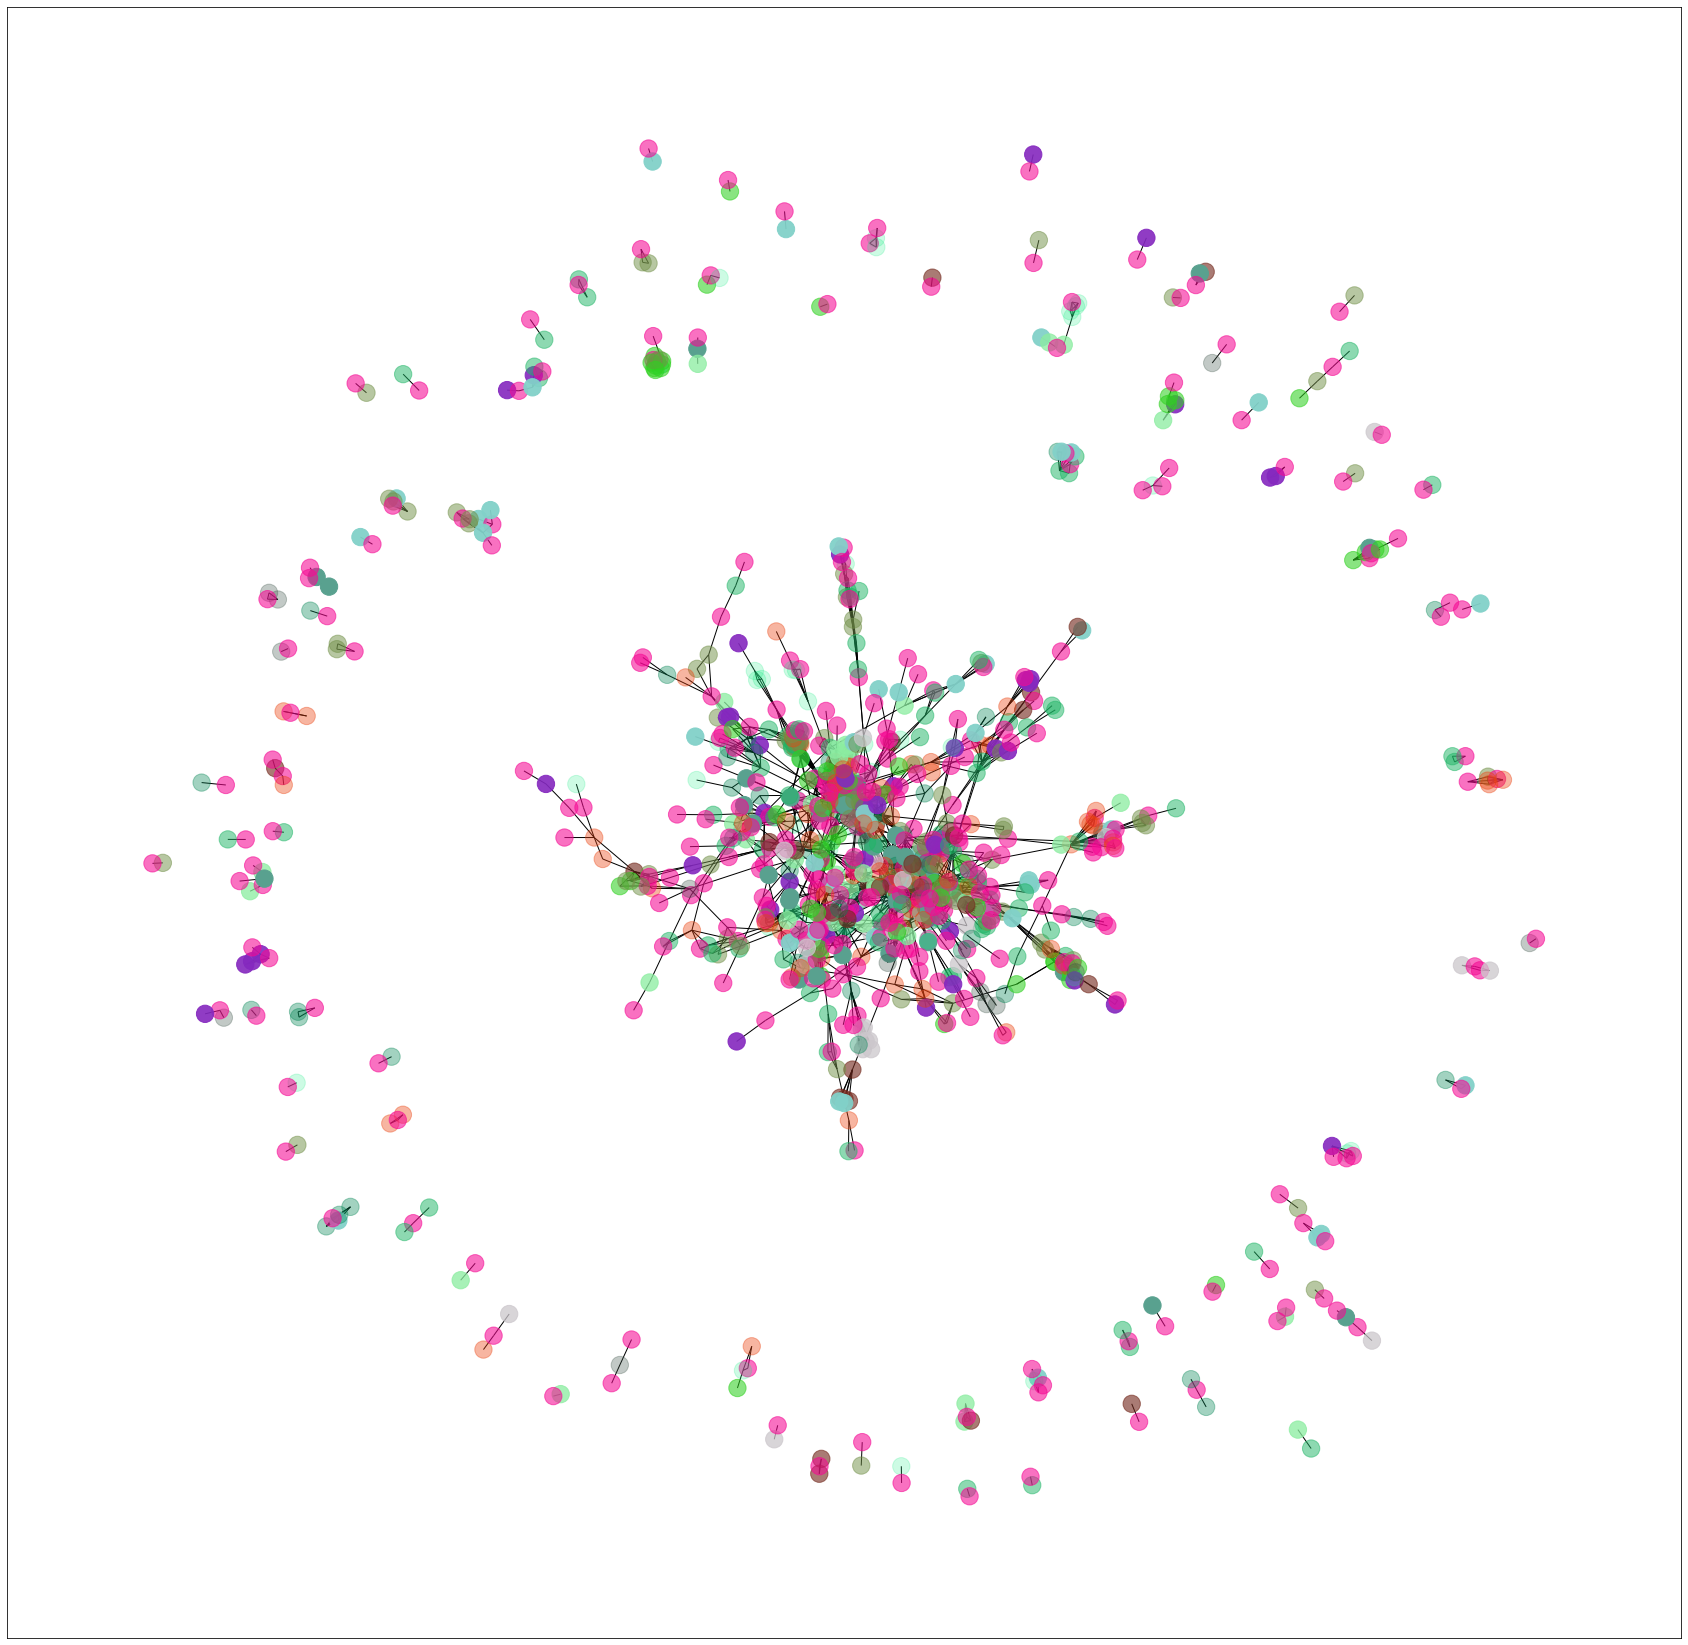

In [529]:
fig = plt.figure(figsize=(30, 30))
nx.draw_networkx(G_auth, with_labels=False, node_color=color_map)

In [312]:
from networkx import degree_centrality

In [337]:
degree_centrality = pd.DataFrame(list(degree_centrality(G_auth).items())).sort_values(by=1, ascending=False)


In [576]:
arxiv_data.groupby([arxiv_data.updated.])

,0,1
401,dan alistarh,0.034548
143,brian bockelman,0.031919
162,maciej besta,0.031168
49,jeremy kepner,0.030417
1128,carole-jean wu,0.024409
...,...,...
1269,david maier,0.000376
1268,jian lu,0.000376
1267,jiannong cao,0.000376
1265,mika göös,0.000376


In [365]:
arxiv_data.head()

,id,title,categories,abstract,doi,created,updated,authors,date,Topic,Topic_Prob
0,902.0782,a multiobjective optimization framework for ro...,cs.ni cs.pf,wireless ad hoc networks are seldom characteri...,NaN,2009-02-04,2010-01-06,"['katia jaffrès-runser', 'cristina comaniciu',...",2010-01-06,7,0.646839
1,904.4155,fundamentals of the backoff process in 802.11:...,cs.ni cs.pf,this paper discovers fundamental principles of...,NaN,2009-04-27,2010-08-20,"['jeong-woo cho', 'yuming jiang']",2010-08-20,12,0.866226
2,1004.1864,the low latency fault tolerance system,cs.dc,the low latency fault tolerance (llft) system ...,NaN,2010-04-11,2010-08-06,"['wenbing zhao', 'p. m. melliar-smith', 'l. e....",2010-08-06,8,0.482404
3,1006.49,optimal degree distributions for uniform small...,cs.dc,motivated by kleinberg's (2000) and subsequent...,NaN,2010-06-24,2010-08-03,"['r. seth terashima', 'james d. fix']",2010-08-03,11,0.603141
4,1007.1802,practically stabilizing atomic memory,cs.dc cs.ni,a self-stabilizing simulation of a single-writ...,NaN,2010-07-11,2010-07-31,"['noga alon', 'hagit attiya', 'shlomi dolev', ...",2010-07-31,6,0.429847


In [458]:
arxiv_data[(arxiv_data['date'] >= '2010-01-01') & (arxiv_data['date'] < '2020-12-31')].pivot_table(columns='Topic-Words', index=arxiv_data.date.dt.to_period("Y"), values='title', aggfunc='count').replace(np.nan, 0).plot(figsize=(20, 20), kind='line')

TypeError: unhashable type: 'list'

In [403]:
arxiv_data.to_csv('../data/processed/arxiv_dataset_topics.csv', index=False)

In [462]:
df_ = arxiv_data[(arxiv_data['date'] >= '2010-01-01') & (arxiv_data['date'] < '2020-12-31')].pivot_table(columns='Topic-Words', index=arxiv_data.date.dt.to_period("Y"), values='title', aggfunc='count').replace(np.nan, 0)

In [463]:
df_ = df_.reset_index()
df_.date = df_.date.astype(str).astype(int)

In [464]:
df_.to_csv('../data/processed/topic_labels.csv', index=False)

In [466]:
import plotly.express as px
figuer = plt.figure(figsize=(30, 30))
df = px.data.stocks()
fig = px.line(df_, x="date", y=df_.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='Topic Evolution over Time')
fig.show()

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<Figure size 2160x2160 with 0 Axes>

In [467]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [530]:
G_spring = nx.spring_layout(G_auth)

In [490]:
list(G.nodes())[1]

'shlomi dolev'

In [551]:
color_map_plotly = []
for node in G_auth: 
    try:
        color_map_plotly.append(colors_plotly[node_colors.loc[node]])
    except:
        color_map_plotly.append(colors_plotly[13])

In [641]:
filtered_authors.to_csv('../data/processed/filtered_authors.csv', index=False)
arxiv_data.to_csv('../data/processed/arxiv_dataset_topics.csv', index=False)

In [648]:
edge_x = []
edge_y = []
G = nx.from_pandas_edgelist(filtered_authors, source='author1', target='author2')
node_colors = filtered_authors.merge(arxiv_data[['id', 'Topic']], left_on='paper_id', right_on='id').groupby('author1')['Topic'].agg(pd.Series.mode).apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)
color_map_plotly = []
for node in G_auth: 
    try:
        color_map_plotly.append(colors_plotly[node_colors.loc[node]])
    except:
        color_map_plotly.append(colors_plotly[13])

G_spring = nx.spring_layout(G_auth)
for edge in G.edges():
    x0, y0 = G_spring[edge[0]]
    x1, y1 = G_spring[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G_spring[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        size=10,
        line_width=2)
)


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    try:
        author = list(G.nodes())[node]
        node_text.append(f'Author: {author}, Topic: {topic_per_author.loc[author].values[0]}, # of connections: '+str(len(adjacencies[1])))
    except KeyError:
        author = list(G.nodes())[node]
        node_text.append(f'Author: {author}, # of connections: '+str(len(adjacencies[1])))
        
        

node_trace.marker.color = color_map_plotly
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Co-Authorship Networks',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text='',
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/vora-family/opt/anaconda3/envs/semis/lib/python3.10/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [571]:
node_trace.marker.color

'rgb(139,81,175)'

In [539]:
def rgb_to_rgba(rgb_value, alpha):
    """
    Adds the alpha channel to an RGB Value and returns it as an RGBA Value
    :param rgb_value: Input RGB Value
    :param alpha: Alpha Value to add  in range [0,1]
    :return: RGBA Value
    """
    return f"rgba{rgb_value[3:-1]}, {alpha})"


In [578]:
degree_centrality.columns = ['author', 'centrality']

In [579]:
degree_centrality.author.apply(lambda x: ar)

401        dan alistarh
143     brian bockelman
162        maciej besta
49        jeremy kepner
1128     carole-jean wu
             ...       
1269        david maier
1268            jian lu
1267       jiannong cao
1265          mika göös
2663       hoeseok yang
Name: author, Length: 2664, dtype: object

In [625]:
topic_per_author = filtered_authors.merge(arxiv_data[['id', 'Topic-Words']], left_on='paper_id', right_on='id').drop('id', axis=1).groupby(['author1', 'Topic-Words']).size().reset_index().sort_values(by=['author1', 0], ascending=False).groupby('author1').first().iloc[:, 0:1]

In [656]:
topic_per_author.to_csv('../data/processed/topic_per_author.csv', index=True)

In [651]:
node_colors.to_csv('../data/processed/node_colors.csv', index=True)

In [653]:
 pd.read_csv('../data/processed/node_colors.csv').set_index('author1')


,Topic
author1,
a. h. hassan,1
abdul dakkak,3
abdullah gani,1
abhishek dubey,8
achim basermann,7
...,...
zibin zheng,4
zohir bouzid,7
zohreh sanaei,4


In [665]:
def define_topic(x):
    try: 
        return topic_per_author.loc[x].values[0]
    except KeyError:
        return ""
degree_centrality['Topic-Words'] = degree_centrality.author.apply(define_topic)

In [668]:
central_nodes = degree_centrality[degree_centrality['Topic-Words'] != ""]

In [662]:
topic_per_author.loc['abdul dakkak']

Topic-Words    learning gpus case study model performance gri...
Name: abdul dakkak, dtype: object

In [673]:
central_nodes.reset_index(drop=True).to_csv("../data/processed/author_centrality.csv", index=False)

In [676]:
central_nodes['Topic-Words'].unique()

array(['cloud computing data distributed systems performance network model resource virtual',
       'analysis data performance big framework research parallel intel access throughput',
       'learning gpus case study model performance grid dynamics federated logic',
       'networks distributed neural network deep wireless learning optimization performance sensor',
       'distributed applications system parallel algorithms performance estimation approach runtime cache',
       'distributed codes real-time storage parallel systems test framework multiplication sparse',
       'distributed networks clustering linear new parallel method implementation algorithm cuda',
       'distributed byzantine systems consensus design optimization testing method agreement discrete',
       'application systems parallel algorithm distributed design optimal system partial robust',
       'parallel algorithm networks based fast systems consensus distributed protocol evaluation',
       'memory efficie